<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/ClassNotebooks/Class_20251117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSE 7530: Differential Scanning Calorimetry (DSC) Class 11/17/2025

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Citation for Paper and Dataset:  
https://royalsocietypublishing.org/doi/10.1098/rsos.211411#d1e517  
https://datadryad.org/dataset/doi:10.5061/dryad.ffbg79cvw

In [3]:
! git clone https://github.com/cbishop4/MSE7530/

Cloning into 'MSE7530'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (331/331), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 496 (delta 109), reused 4 (delta 4), pack-reused 165 (from 1)
Receiving objects: 100% (496/496), 75.49 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [4]:
PLA_file = '/content/MSE7530/sampledata/DSC_PLA.txt'
comp_file = '/content/MSE7530/sampledata/DSC_PLA-STARCH-CHITIN.txt'

In [ ]:
import importlib
import pandas as pd
importlib.reload(pd)
DSCdict = {}
for n in range(4):
  DSCdict[labels[n]] = pd.read_csv(DSCfiles[n], sep=r'\s+', encoding='utf-16', header=None)

### Load data and examine

In [6]:
PLA = pd.read_csv(PLA_file, sep=r'\s+', encoding='utf-16', header=None)
comp = pd.read_csv(comp_file, sep=r'\s+', encoding='utf-16', header=None)

#### Task 1: Plot each data channel

In [8]:
# examine the dataframes
PLA

,0,1,2
0,-4.000000,1.00000,0.000000
1,0.007167,39.82080,-1.436948
2,0.012167,39.83519,-1.340262
3,0.018833,39.85163,-1.222551
4,0.023833,39.86222,-1.139465
...,...,...,...
18985,104.538800,199.81760,-0.411590
18986,104.545500,199.81790,-0.410016
18987,104.550500,199.81900,-0.407446
18988,-2.000000,4.00000,0.000000


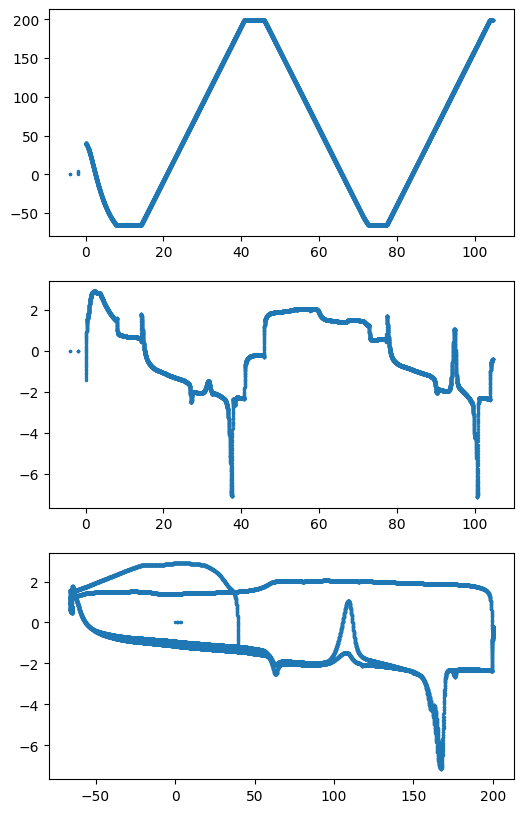

In [15]:
run = PLA
fig, ax = plt.subplots(3,1,figsize=(6,10))
ax[0].plot(run[0],run[1],'o',markersize=1.5)
ax[1].plot(run[0],run[2],'o',markersize=1.5)
ax[2].plot(run[1],run[2],'o',markersize=1.5)

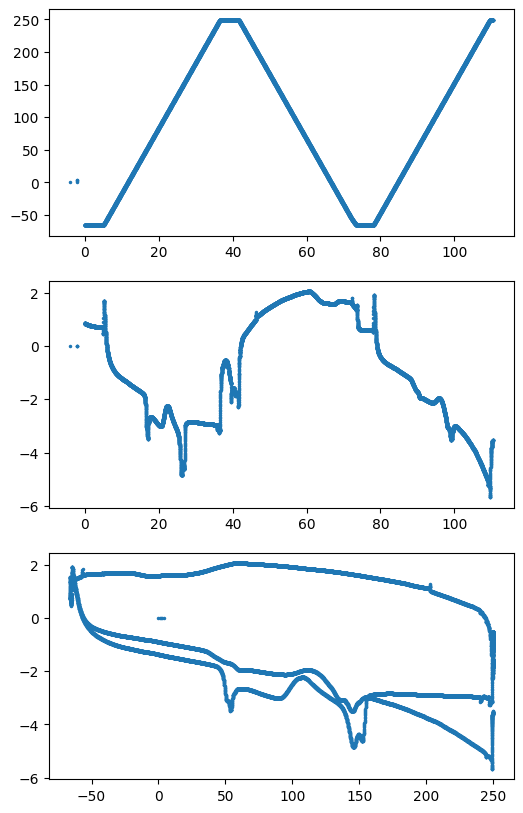

In [16]:
run = comp
fig, ax = plt.subplots(3,1,figsize=(6,10))
ax[0].plot(run[0],run[1],'o',markersize=1.5)
ax[1].plot(run[0],run[2],'o',markersize=1.5)
ax[2].plot(run[1],run[2],'o',markersize=1.5)

#### Split into individual ramps

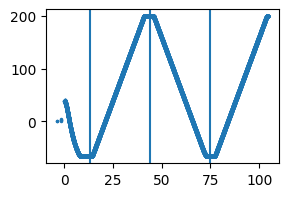

In [17]:
run = PLA
fig, ax = plt.subplots(figsize=(3,2))
fig.subplots_adjust(hspace=0)
ax.plot(run[0], run[1],'o',markersize=1.5)
ax.axvline(13); ax.axvline(44); ax.axvline(75)

Text(0, 0.5, 'Temp (C)')

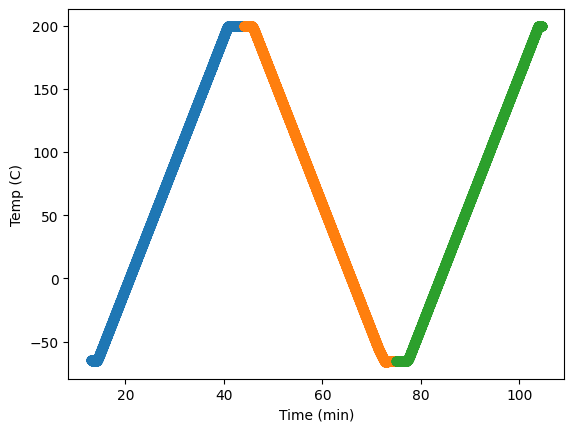

In [18]:
range = run[run[0] > 13]
H1 = range[range[0]<44]
C1 = range[range[0]>44]
C1 = C1[C1[0]<75]
H2 = range[range[0]>75]
plt.plot(H1[0],H1[1],'o')
plt.plot(C1[0],C1[1],'o')
plt.plot(H2[0],H2[1],'o')
plt.xlabel('Time (min)')
plt.ylabel('Temp (C)')

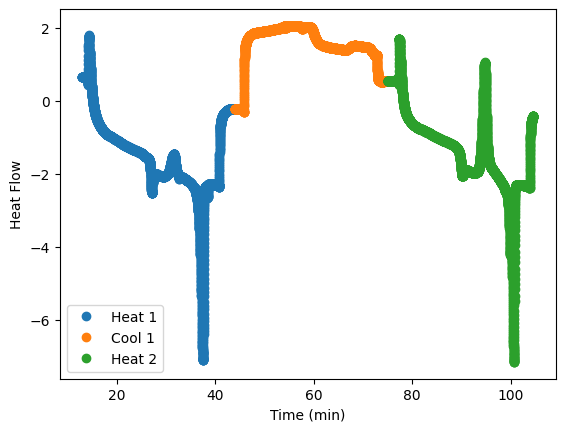

In [19]:
range = run[run[0] > 13]
H1 = range[range[0]<44]
C1 = range[range[0]>44]
C1 = C1[C1[0]<75]
H2 = range[range[0]>75]
plt.plot(H1[0],H1[2],'o',label='Heat 1')
plt.plot(C1[0],C1[2],'o',label='Cool 1')
plt.plot(H2[0],H2[2],'o',label='Heat 2')
plt.xlabel('Time (min)')
plt.ylabel('Heat Flow')
plt.legend()

#### Task 2: Find the transition Temperatures for each heat and cool run  
We have things split into H1, C1, and H2. Strategies? Find Peaks? Differentiation?

#### Task 3: Find the transition enthalpies on the heating runs. Do they match from Heat 1 to Heat 2?

#### Task 4: Calculating the Apparent Heat Capacity.  
Approach?